In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

In [320]:
lineData = pd.read_json('line_count.json')
lines = np.asarray(lineData["count"])
# Remove zero-line entries
lines_nonzero = lines[np.where(lineData["count"]!=0)]

In [321]:
# Apply fit to data
def func(x, a, b, c):
    return a * np.exp(-1.0*(x/b)) + c

#x = np.linspace(0, np.size(lines_nonzero)-1, np.size(lines_nonzero))


Decay constant is 3659.1106880522225
Total lines of code up to cutoff is 2617567


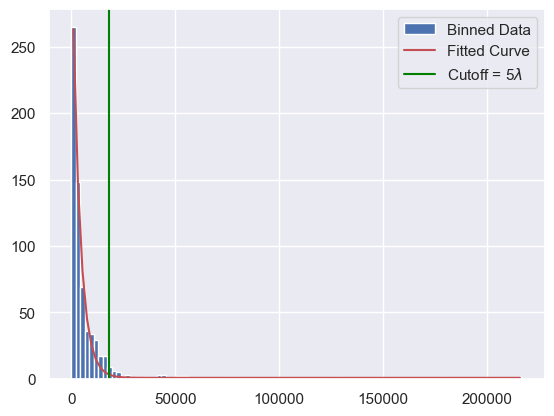

In [322]:
x = np.linspace(0, lines_nonzero.size - 1, lines_nonzero.size)
nbins = 100

n, bin_borders, _ = plt.hist(lines_nonzero, nbins, label="Binned Data")
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
p0 = [1, 1E2, 1]
popt, pcov = curve_fit(func, bin_centers, n, p0)
plt.plot(bin_centers, func(bin_centers, *popt), 'r-', label="Fitted Curve")
#plt.xlim(0,50000)
#plt.gca().set_yscale('log')
cutoff = 5 # units of fit characteristic decay constant
plt.axvline(x = cutoff*popt[1], ymin = 0, ymax = 1, color='green', label = f"Cutoff = {cutoff}"+r"$\lambda$")
plt.legend()

print(f"Decay constant is {popt[1]}")

# Compute total lines of code within the cutoff
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
# Find index that is nearest to the cutoff
#find_nearest(lines_nonzero, func(x,*popt))
cutoff_index = np.where(lines_nonzero == find_nearest(lines_nonzero, func(x,*popt)))[0][0]
lines_at_cutoff = np.sum(lines_nonzero[0:cutoff_index])
print(f"Total lines of code up to cutoff is {lines_at_cutoff}")

In [323]:
# Some statistics to see what's interesting
mean = np.mean(lines_nonzero)
median = np.median(lines_nonzero)
mode = stats.mode(lines_nonzero)[0]
sum = np.sum(lines_nonzero)
max = np.max(lines_nonzero)
print(f"Mean: {mean:.0f}, Median: {median:.0f}, Mode: {mode:.0f}, Sum: {sum:.0f}, Max: {max}")

Mean: 7050, Median: 2869, Mode: 242, Sum: 4660176, Max: 216997


In [324]:
# Determine PA# nearest to median
median_index = np.where(lines_nonzero == find_nearest(lines_nonzero, np.median(lines_nonzero)))[0][0]
lineData["program"][median_index]

'pa0717'

#### Ideas:
- Remove unused applications from dataset, if possible (i.e. not mapped to index page, not frequently used over time frame, Linac)
- Weight applications by priority (usage stats and interview criticality), redo analysis to determine window
- Use exponential fit, choose windows as integer multiples fit characteristic time constant (instead of standard deviation)

Maybe for CD-1, do first and third idea above. Priority weighting can refine estimate for CD-2.

John: effort is not linear with lines-of-code. Really wants to see how long it takes to port median application.

In [325]:
#all_data = pd.concat([df, lineCount['count']], axis=1, join='outer')